* Reference: __Algorithmic Trading: Winning Strategies and Their Rationale__ _by_ Ernest P. Chan

# Mean Reversion

This description of the mean-reverting processes closely follows the work of _Ernest P. Chan_ __Algorithmic Trading: Winning Strategies and Their Rationale__  [available here](https://www.wiley.com/en-us/Algorithmic+Trading%3A+Winning+Strategies+and+Their+Rationale-p-9781118460146). 

Additional information on the Engle-Granger cointegration test can be found in a paper by _Faik Bilgili_ __Stationarity and cointegration tests: Comparison of Engle-Granger and Johansen methodologies__ [available here](https://mpra.ub.uni-muenchen.de/75967/1/MPRA_paper_75967.pdf).

## Introduction

Mean-reverting processes and events often occur in nature. Observations of the processes that have a mean-reverting nature tend to move to their average value over time. However, as mentioned in the work of E.P. Chan, most financial price series are not mean-reverting.

The upside is that we can construct advanced financial instruments from multiple simple ones thus obtaining the desired property. Observation series (stock, commodity prices, etc.) that can be combined to achieve a mean-reverting process are called *cointegrating*. The approach described above allows us to use the properties of mean-reverting processes to generate profit.

## Augmented Dickey–Fuller (ADF) test

According to Ernest P. Chan:
"The mathematical description of a mean-reverting price series is that the change of the price series in the next period is proportional to the difference between the mean price and the current price. This gives rise to the ADF test, which tests whether we can reject the null hypothesis that the proportionality
constant is zero."

The ADF test is based on the idea that the current price level gives us information about the future price level: if it's lower than the mean, the next move will be upwards, and vice versa.

The ADF test uses the linear model that describes the price changes as follows:

$$\Delta y(t) = \lambda y(t-1) + \mu + \beta t + \alpha_1 \Delta y(t-1) + ... \alpha_k \Delta y(t-k) + \epsilon_t$$

where $\Delta y(t) \equiv y(t) - y(t-1)$, $\Delta y(t) \equiv y(t-1) - y(t-2)$, ...

The hypothesis that is being tested is: $\lambda = 0$. For simplicity we assume the drift term to be zero ($\beta = 0$). If we reject the hypothesis, this means that the next price move depends on the current price level.


## The Half-life period

Mean reversion tests, such as ADF usually require at least 90 percent certainty. But in practice, we can create strategies that are profitable even at lower certainty levels. The measure $\lambda$ can be used to calculate the *half-life*, which indicates how long it takes for a price to mean revert:

$$Half-life = -log(2) / \lambda$$

Furthermore, we can see that if the $\lambda$ value is positive, the price series are not mean-reverting. If it's close to zero, the half-life is very long and the strategy won't be profitable due to slow mean reversion.

Half-life period can be helpful to determine some of the parameters to use in the trading strategy. Say, if the half-life period is 20 days, then using 5 days backward-looking window for moving average or volatility calculation may not give the best results.

The most common approach is to use two cointegrated price series to construct a portfolio. This is done by simultaneously going long on one asset and short on the other, with an appropriate capital allocation for each asset. This approach is also called a "pairs trading strategy". However, the approach can be extended to three and more assets.

## Johansen cointegration test

This is one of the most widely used cointegration tests, it's upside is that, first it allows multiple price series for stationarity testing, and second it provides hedge ratios for price series used to combine elements into a stationary portfolio.

To understand how to test the cointegration of more than two variables, we can transform the equation used in the ADF test to a vector form. So $y(t)$ would be vectors representing multiple price series, and the $\lambda$ and $\alpha$ are matrices. We also assume that the drift term is zero ($\beta t = 0$). So the equation can be rewritten as follows:

$$\Delta Y(t) = \Lambda Y(t-1) + M + A_1 \Delta Y(t-1) + ... + A_k \Delta Y(t-k) + \epsilon_t$$

This way we can test the hypothesis of $\Lambda = 0$, in which case, we don't have cointegration present. Denoting the rank of the obtained matrix $\Lambda$ as $r$ and the number of price series as $n$, the number of independent portfolios that can be formed is equal to $r$.

The Johansen test calculates the $r$ and tests the hypotheses of $r = 0$ (cointegrating relationship exists), $r \le 1$, ..., $r \le n - 1$. In case all the above hypotheses are rejected, the result is that $r = n$ and the eigenvectors of the $\Lambda$ can be used as hedge ratios to construct a mean-reverting portfolio.

Note that the Johansen test is independent of the order of the price series, in contrast to the CADF test.

## Engle-Granger cointegration test


The cointegration testing approach proposed by Engle-Granger allows us to test whether two or more price series are cointegrated of a given order.

The Engle-Granger cointegration test is performed as follows:

- First, we need to determine the order of integration of variables $x$ and $y$
  (or $y_{1}, y_{2}, ...$ in case of more than two variables). If they are integrated of the same order, we can apply the cointegration test.
- Next, if the variables are integrated of order one at the previous step, the following regressions can be performed:

$$x_t = a_0 + a_1 y_t + e_{1,t},$$

$$y_t = b_0 + b_1 x_t + e_{2,t}$$

- Finally we run the following regressions and test for unit root for each equation:

$$\Delta e_{1,t} = a_1 e_{1, t-1} + v_{1, t},$$

$$\Delta e_{2,t} = a_2 e_{2, t-1} + v_{2, t}$$

If we cannot reject the null hypotheses that $|a_1| = 0$ and $|a_2| = 0$, we cannot reject the hypothesis that the variables are not cointegrated.

The hedge ratios for constructing a mean-reverting portfolio in the case of the Engle-Granger test are set to $1$ for the $x$ variable and the coefficient $-a_1$ for the $y$ variable (or $-a_1, -a_2, ..$ in case of multiple $y_i$ price series).

The Engle-Granger cointegration test implemented in the ArbitrageLab package assumes that the first step of the algorithm is passed and that the variables are integrated of order one.

## Linear trading strategy

Using a mean-reverting portfolio obtained from the Johansen test, a linear mean-reverting trading strategy can be constructed.

The idea is to own a number of units of a portfolio proportional to their negative normalized deviation from its moving average (the Z-score). A unit portfolio is the one with shares of its elements determined by the eigenvector of the $\Lambda$ matrix from the Johansen test.

So the number of portfolio units to hold ($N_t$) is calculated as:

$$N_{t} = \frac{P_{t} - MA(P_{t}, T_{MA})}{std(P_{t}, T_{std})}$$

where

- $P_{t}$ is the price of a portfolio,

- $MA(P_{t}, T_{MA})$ is the moving average of the portfolio price calculated
  using a backward-looking $T_{MA}$ window,

- $std(P_{t}, T_{std})$ is the rolling standard deviation of the portfolio price
  calculated using a backward-looking $T_{std}$ window.

Linear strategy in this case means that the number of invested units is proportional to the Z-Score and not that the market value of our investment is proportional.

For this basic strategy, the maximum required capital is unknown, therefore it's not a very practical one in its simplest version.

The upside however is that this strategy has no parameters to optimize (the windows for moving average and the rolling standard deviation taken equal to the half-life period) and is useful for backtesting the properties of a mean-reverting price series.

## Bollinger Bands trading strategy

This is a more practical strategy in comparison to the Linear Trading strategy mentioned in this module, as it deals with the issues present in the linear strategy: infinitesimal portfolio rebalances and no predefined buying power (as the costs needed to be allocated to the strategy are dependant on the Z-score).

By using the Bollinger bands on the Z-scores from the linear mean-reversion trading strategy, we can construct a more practical trading strategy. The idea is to enter a position only when the price deviates by more than *entryZscore* standard deviations from the mean. This parameter can be optimized in a training set.

Also, the look-back windows for calculating the mean and the standard deviation are the parameters that can be optimized. We can later exit the strategy when the price reverts to the *exitZscore* standard deviations from the mean (*exitZscore* $<$ *entryZscore*).

If *exitZscore* $= -$ *entryZscore*, we will exit when the price moves beyond the opposite band, also triggering a trading signal of the opposite sign. At either time we can have either zero or one unit (long or short) invested, so capital allocation is easy.

If the look-back window is short and we set a small *entryZscore* and *exitZscore*, the holding period will be shorter and we get more round trip trades and generally higher profits.

## Usage of the Algorithms

Let's use the above tools on real data. 

First, we will use the cointegration tests on datasets to determine if it's possible to construct a mean-reverting portfolio. Then we will create such a portfolio, find its half-lif, and run trading strategies on it. Finally, we will analyze the obtained results. 

In [1]:
import arbitragelab as al
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Loading data

Following the example in the Optimal Mean Reversion module, we will use Gold Shares ETF (GLD), Gold Miners ETF (GDX), and Junior Gold Miners ETF (GDXJ) to construct a portfolio of three elements.

In [2]:
# Loading data
train_data =  yf.download("GLD GDX GDXJ", start="2016-01-01", end="2018-01-01")
test_data =  yf.download("GLD GDX GDXJ", start="2018-01-02", end="2020-01-01")

# Taking close prices for chosen instruments
train_three_elements = train_data["Adj Close"][["GLD", "GDX", "GDXJ"]]

test_three_elements = test_data["Adj Close"][["GLD", "GDX", "GDXJ"]]

# Looking at the downloaded data
train_three_elements.head()

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


,GLD,GDX,GDXJ
Date,,,
2015-12-31,101.459999,13.404492,18.068029
2016-01-04,102.889999,13.765984,18.622953
2016-01-05,103.180000,13.697593,18.660576
2016-01-06,104.669998,13.922304,18.980366
2016-01-07,106.150002,14.537816,19.422426


### Johansen test

Now let's run the cointegration tests and analyze the results.

In [3]:
# Initialising an object containing needed methods
j_portfolio = al.cointegration_approach.JohansenPortfolio()

# Fitting the data on a dataset of three elements with constant term
j_portfolio.fit(train_three_elements, det_order=0)

# Getting results of the eigenvalue and trace Johansen tests
j_eigenvalue_statistics = j_portfolio.johansen_eigen_statistic
j_trace_statistics = j_portfolio.johansen_trace_statistic
j_cointegration_vectors = j_portfolio.cointegration_vectors

In [4]:
# First, the eigenvalue statistic test
j_eigenvalue_statistics

,GLD,GDX,GDXJ
90%,18.892800,12.297100,2.705500
95%,21.131400,14.263900,3.841500
99%,25.865000,18.520000,6.634900
eigen_value,23.136751,12.896923,4.058007


Using the eigenvalue statistic test, we can see that our eigenvalue statistics are above the 95% significance level values for two elements - GLD and GDXJ. And they are all above the 90% significance level values.

So at a 90% significance level, three elements are cointegrated, we can construct three possible mean-reverting portfolios using the coefficients from the 
*j_cointegration_vectors* variable.

In [5]:
# Next, the alternative trace statistic test
j_trace_statistics

,GLD,GDX,GDXJ
90%,27.066900,13.42940,2.705500
95%,29.796100,15.49430,3.841500
99%,35.462800,19.93490,6.634900
trace_statistic,40.091682,16.95493,4.058007


We have slightly different results for the trace statistic test. Here, all three trace statistics are above the 95% significance level values.

According to this test, at a 95% significance level, three elements are cointegrated, we can construct three possible mean-reverting portfolios using the coefficients from the same *j_cointegration_vectors* variable.

In [6]:
# Coefficients to construct a mean-reverting portfolio 
j_cointegration_vectors

,GLD,GDX,GDXJ
0,0.406693,-1.764145,0.648858
1,-0.000709,0.529261,-0.120005
2,-0.209996,-0.199244,0.292736


### Engle-Granger test

In [7]:
# Initialising an object containing needed methods
eg_portfolio = al.cointegration_approach.EngleGrangerPortfolio()

# Fitting the data on a dataset of three elements with constant term
eg_portfolio.fit(train_three_elements, add_constant=True)

# Getting results of the Engle-Granger test
eg_adf_statistics = eg_portfolio.adf_statistics
eg_cointegration_vectors = eg_portfolio.cointegration_vectors

In [8]:
# Looking at the statistic from the last step of the Engle-Granger test
eg_adf_statistics

,0
99%,-3.443418
95%,-2.867303
90%,-2.569840
statistic_value,-3.260982


Using the ADF statistic test output, we can see that our statistic is above the 95% significance level value.

So at a 95% significance level, our elements are cointegrated, we can construct a mean-reverting portfolio using the coefficients from the *eg_cointegration_vectors* variable.

In [9]:
eg_cointegration_vectors

,GLD,GDX,GDXJ
0,1.0,-3.202534,0.951377


As described in the theoretical part, the coefficient for the first element is $1$, while other two are equal to negative regression coefficients.

### Constructing portfolios

First, let's construct a portfolio using the coefficients obtained from the Johansen cointegration test. Next, using the coefficients from the Engle-Granger tests and compare these portfolio values. 

In [10]:
# Calculating returns of our elements (ETFs)
train_three_elements_returns = (train_three_elements / train_three_elements.shift(1) - 1)[1:]

train_three_elements_returns.head()

,GLD,GDX,GDXJ
Date,,,
2016-01-04,0.014094,0.026968,0.030713
2016-01-05,0.002819,-0.004968,0.002020
2016-01-06,0.014441,0.016405,0.017137
2016-01-07,0.014140,0.044210,0.023290
2016-01-08,-0.004428,-0.024194,-0.028571


In [11]:
# Weights of elements for the Johansen portfolio
j_cointegration_vectors.loc[0]

GLD     0.406693
GDX    -1.764145
GDXJ    0.648858
Name: 0, dtype: float64

In [12]:
# Scaling cointegration vectors so they sum up to 1
j_scaled_vectors = j_cointegration_vectors.loc[0] / abs(j_cointegration_vectors.loc[0]).sum()

j_scaled_vectors

GLD     0.144233
GDX    -0.625651
GDXJ    0.230116
Name: 0, dtype: float64

In [13]:
# Also adding weights to take initial prices of our ETFs into account
weights  = train_three_elements.iloc[0] / abs(train_three_elements.iloc[0]).sum()

In [14]:
# Calculating portfolio values during the training period
j_portfolio_returns = (train_three_elements_returns * j_scaled_vectors * weights).sum(axis=1)
j_portfolio_price = (j_portfolio_returns + 1).cumprod()

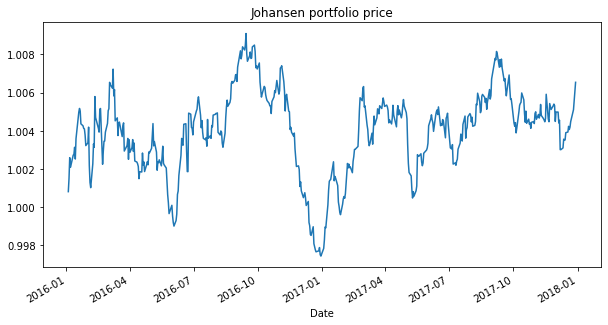

In [15]:
# Plotting Johansen portfolio price
j_portfolio_price.plot(title='Johansen portfolio price', figsize=(10,5));

In [16]:
# Weights of elements for the Engle-Granger portfolio
eg_cointegration_vectors.loc[0]

GLD     1.000000
GDX    -3.202534
GDXJ    0.951377
Name: 0, dtype: float64

In [17]:
# Scaling weights so they sum up to 1
eg_scaled_vectors = eg_cointegration_vectors.loc[0] / abs(eg_cointegration_vectors.loc[0]).sum()

eg_scaled_vectors

GLD     0.194027
GDX    -0.621379
GDXJ    0.184593
Name: 0, dtype: float64

In [18]:
# Calculating portfolio values during the training period
eg_portfolio_returns = (train_three_elements_returns * eg_scaled_vectors * weights).sum(axis=1)
eg_portfolio_price = (eg_portfolio_returns + 1).cumprod()

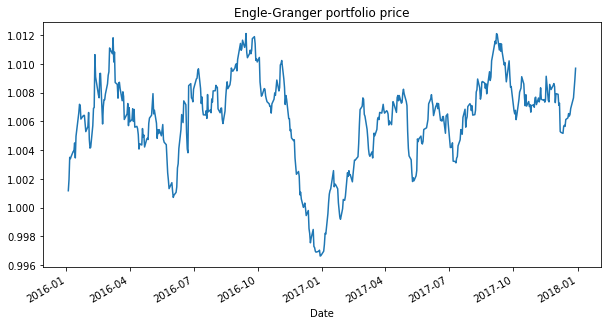

In [19]:
# Plotting Engle-Granger portfolio price
eg_portfolio_price.plot(title='Engle-Granger portfolio price', figsize=(10,5));

We can see that these portfolios perform similarly, as relative weights of elements in them are close. Let's compare them if we upscale the weights of the Johansen portfolio to match the weight of the first weight in the Engle-Granger portfolio.

In [20]:
# Scaling Johansen portfolio weights
weights = pd.concat([j_cointegration_vectors.loc[0]*2.459,
                     eg_cointegration_vectors.loc[0]],
                    axis=1,
                    keys = ['Johansen weights', 'Engle-Granger weights'])

weights

,Johansen weights,Engle-Granger weights
GLD,1.000059,1.000000
GDX,-4.338033,-3.202534
GDXJ,1.595543,0.951377


Another way to construct portfolios is by using the construct_mean_reverting_portfolio function from the JohansenPortfolio or the EngleGrangerPortfolio class. This portfolio is created by summing up price series with given coefficients.

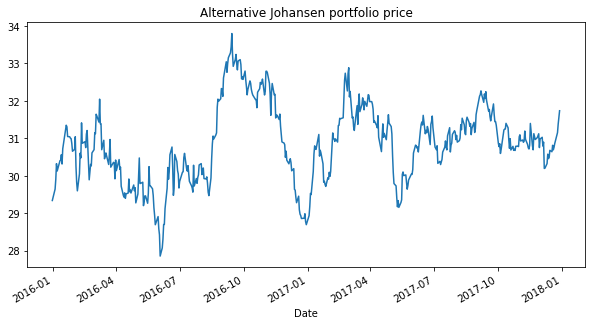

In [21]:
# Alternative way to construct portfolios
alternative_j_portfolio_price = j_portfolio.construct_mean_reverting_portfolio(train_three_elements, j_cointegration_vectors.loc[0])

# Plotting the portfolio price
alternative_j_portfolio_price.plot(title='Alternative Johansen portfolio price', figsize=(10,5));

### Calculating the half-life of obtained portfolios 

In [22]:
# Importing the needed function
from arbitragelab.cointegration_approach import get_half_life_of_mean_reversion

In [23]:
j_half_life = get_half_life_of_mean_reversion(j_portfolio_price)

print('Half-life of the Johansen portfolio is', j_half_life, 'days.')

Half-life of the Johansen portfolio is 18.022169259922418 days.


In [24]:
eg_half_life = get_half_life_of_mean_reversion(eg_portfolio_price)

print('Half-life of the Engle-Granger portfolio is', eg_half_life, 'days.')

Half-life of the Engle-Granger portfolio is 21.96123424138431 days.


Since the half-life of the Johansen portfolio is shorter, it is reverting to its mean value faster, so we will be using it to test the trading strategies.

Applying them to the Engle-Granger portfolio can be done in the same way.

### Applying the Linear trading strategy

First, we want to apply the trading strategies on the test data, so we will construct a portfolio for testing - based on the data not used for determining Johansen portfolio weights and it's half-life. 

In [25]:
# Importing the needed function
from arbitragelab.cointegration_approach import linear_trading_strategy

In [26]:
# Creating a test portfolio based on the Johansen test results
test_three_elements_returns = (test_three_elements / test_three_elements.shift(1) - 1)[1:]

# Scaling weights for them to sum up to 1
j_scaled_vectors = j_cointegration_vectors.loc[0] / abs(j_cointegration_vectors.loc[0]).sum()

# Also adding weights to take initial prices of ETFs into account
weights  = test_three_elements.iloc[0] / abs(test_three_elements.iloc[0]).sum()

test_portfolio_returns = (test_three_elements_returns * j_scaled_vectors * weights).sum(axis=1)

test_portfolio_price = (test_portfolio_returns + 1).cumprod()

In [27]:
# Applying a linear trading strategy
linear_trading_results = linear_trading_strategy(test_portfolio_price,
                                                 sma_window = int(j_half_life),
                                                 std_window = int(j_half_life))

linear_trading_results.tail()

,portfolio_series,z_score,target_quantity
Date,,,
2019-12-24,1.002781,0.508440,-0.508440
2019-12-26,1.003381,1.755762,-1.755762
2019-12-27,1.003312,1.449163,-1.449163
2019-12-30,1.002839,0.235868,-0.235868
2019-12-31,1.003485,1.626774,-1.626774


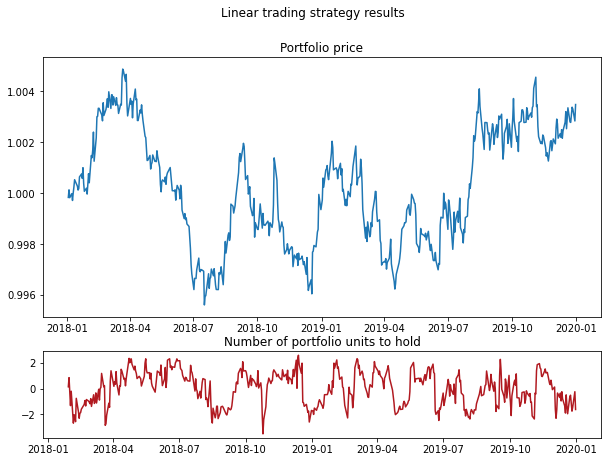

In [28]:
# Plotting the results
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10,7))
fig.suptitle('Linear trading strategy results')

axs[0].plot(linear_trading_results.iloc[:,0])
axs[0].title.set_text('Portfolio price')

axs[1].plot(linear_trading_results.iloc[:,2], '#b11a21')
axs[1].title.set_text('Number of portfolio units to hold')

The upper graph shows the price of a mean-reverting portfolio - the same price series that were used as an input to the linear_trading_strategy function. 
The lower graph shows the target amount of portfolio units to hold at any given time. 

We might want to get trading signals from a more advanced strategy.   

### Applying Bollinger Bands trading strategy

This trading strategy requires defining entry and exit Z-scores. Let's choose the entry Z-score - upon which the strategy will enter a short position, going short one unit of a portfolio. This position will be closed once the exit Z-score will be reached and the position of the opposite side will be opened.

In our example, we will be using an entry Z-score of 2 and an exit Z-score of -2.

In [29]:
# Importing the needed function
from arbitragelab.cointegration_approach import bollinger_bands_trading_strategy

In [30]:
# Applying Bollinger Bands trading strategy
bollinger_trading_results = bollinger_bands_trading_strategy(test_portfolio_price,
                                                 sma_window = int(j_half_life),
                                                 std_window = int(j_half_life),
                                                 entry_z_score=2,
                                                 exit_z_score=-2)

bollinger_trading_results.tail()

,portfolio_series,z_score,target_quantity,long_units,short_units
Date,,,,,
2019-12-24,1.002781,0.508440,-1.0,0.0,-1.0
2019-12-26,1.003381,1.755762,-1.0,0.0,-1.0
2019-12-27,1.003312,1.449163,-1.0,0.0,-1.0
2019-12-30,1.002839,0.235868,-1.0,0.0,-1.0
2019-12-31,1.003485,1.626774,-1.0,0.0,-1.0


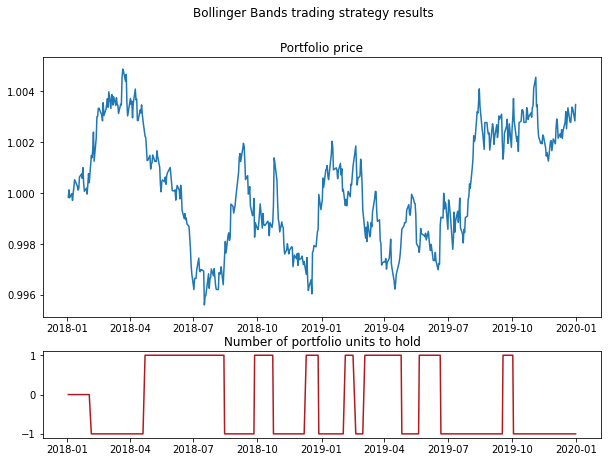

In [31]:
# Plotting the results
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10,7))
fig.suptitle('Bollinger Bands trading strategy results')

axs[0].plot(bollinger_trading_results.iloc[:,0])
axs[0].title.set_text('Portfolio price')

axs[1].plot(bollinger_trading_results.iloc[:,2], '#b11a21')
axs[1].title.set_text('Number of portfolio units to hold')

Again, the upper graph shows the price of a mean-reverting portfolio - the same price series that were used as an input to the bollinger_bands_trading_strategy function. The lower graph shows the target amount of portfolio units to hold at any given time. Note that the amount invested is limited to 1 portfolio unit - long or short.

From the above example, the Bollinger Bands strategy is generating multiple signals to open long and short positions on our mean-revering portfolio.

Let's calculate the equity curve of our portfolio, if we would use this trading strategy on this data. We should shift the trading signals one observation ahead to avoid the lookahead bias in this example.

In [32]:
# Calculating the price of our investment portfolio
investment_portfolio_retunrs = test_portfolio_returns * bollinger_trading_results.iloc[:,2].shift(1)

investment_portfolio_price = (investment_portfolio_retunrs + 1).cumprod()

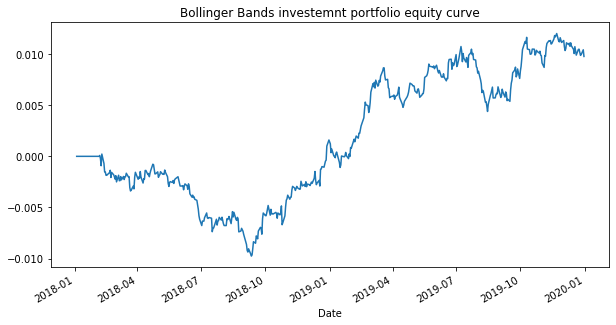

In [33]:
# Calculating the equity curve of our investment portfolio
investment_portfolio_equity_curve = investment_portfolio_price - 1

# Plotting the equity curve
investment_portfolio_equity_curve.plot(title='Bollinger Bands investemnt portfolio equity curve', figsize=(10,5));

Using trading signals from the Bollinger Bands strategy for this particular example resulted in the value of our investment portfolio increasing from 1 in mid-September 2018 to around 1.01 at the beginning of the year 2020.

We can further test this strategy by choosing different entry and exit Z-scores, or adding transaction costs to see if the strategy is robust.

## Conclusion

This notebook describes the Mean Reversion module tools - cointegration tests and trading strategies. Also, it shows how these tools can be used on real data and that they can output profitable trading signals.

The algorithms and the descriptions used in this notebook were described by _Ernest P. Chan_ in the book __Algorithmic Trading: Winning Strategies and Their Rationale__  [available here](https://www.wiley.com/en-us/Algorithmic+Trading%3A+Winning+Strategies+and+Their+Rationale-p-9781118460146).

Key takeaways from the notebook:

- Mean-reverting processes tend to move to their average value over time. However, most financial price series are not mean-reverting.
- Financial instruments can be combined in a portfolio that has mean-reverting properties.
- ADF test allows testing if the next price move depends on the current price level.
- Half-life of a mean-reverting process indicates how long it takes for a price to mean revert.
- Both Johansen and Engle-Granger cointegration tests allow testing if we can construct a mean-reverting portfolio out of multiple price series, and if so, which combination of these elements should we use to construct a portfolio.
- Constructed portfolios can be used in the Linear and Bollinger Bands trading strategies.
- The Bollinger Bands  strategy  deals with the issues present in the linear strategy: infinitesimal portfolio rebalances and no predefined buying power.